# Hospital Readmissions Data Analysis and Recommendations for Reduction

### Background
In October 2012, the US government's Center for Medicare and Medicaid Services (CMS) began reducing Medicare payments for Inpatient Prospective Payment System hospitals with excess readmissions. Excess readmissions are measured by a ratio, by dividing a hospital’s number of “predicted” 30-day readmissions for heart attack, heart failure, and pneumonia by the number that would be “expected,” based on an average hospital with similar patients. A ratio greater than 1 indicates excess readmissions.

### Exercise Directions

In this exercise, you will:
+ critique a preliminary analysis of readmissions data and recommendations (provided below) for reducing the readmissions rate
+ construct a statistically sound analysis and make recommendations of your own 

More instructions provided below. Include your work **in this notebook and submit to your Github account**. 

### Resources
+ Data source: https://data.medicare.gov/Hospital-Compare/Hospital-Readmission-Reduction/9n3s-kdb3
+ More information: http://www.cms.gov/Medicare/medicare-fee-for-service-payment/acuteinpatientPPS/readmissions-reduction-program.html
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
****

In [1]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#import bokeh.plotting as bkp
from mpl_toolkits.axes_grid1 import make_axes_locatable

In [2]:
# read in readmissions data provided
hospital_read_df = pd.read_csv('data/cms_hospital_readmissions.csv')

****
## Preliminary Analysis

In [3]:
# deal with missing and inconvenient portions of data 
clean_hospital_read_df = hospital_read_df[hospital_read_df['Number of Discharges'] != 'Not Available']
clean_hospital_read_df.loc[:, 'Number of Discharges'] = clean_hospital_read_df['Number of Discharges'].astype(int)
clean_hospital_read_df = clean_hospital_read_df.sort_values('Number of Discharges')

C:\Users\Caitlin\Miniconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


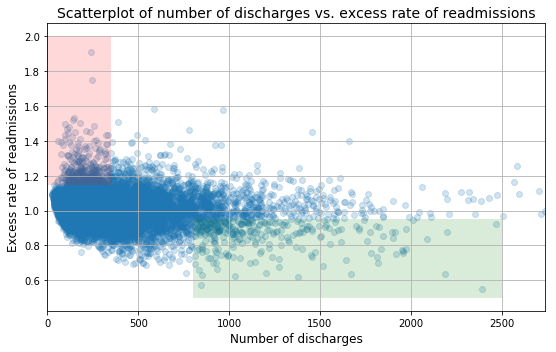

In [4]:
# generate a scatterplot for number of discharges vs. excess rate of readmissions
# lists work better with matplotlib scatterplot function
x = [a for a in clean_hospital_read_df['Number of Discharges'][81:-3]]
y = list(clean_hospital_read_df['Excess Readmission Ratio'][81:-3])

fig, ax = plt.subplots(figsize=(8,5))
ax.scatter(x, y,alpha=0.2)

ax.fill_between([0,350], 1.15, 2, facecolor='red', alpha = .15, interpolate=True)
ax.fill_between([800,2500], .5, .95, facecolor='green', alpha = .15, interpolate=True)

ax.set_xlim([0, max(x)])
ax.set_xlabel('Number of discharges', fontsize=12)
ax.set_ylabel('Excess rate of readmissions', fontsize=12)
ax.set_title('Scatterplot of number of discharges vs. excess rate of readmissions', fontsize=14)

ax.grid(True)
fig.tight_layout()

****

## Preliminary Report

Read the following results/report. While you are reading it, think about if the conclusions are correct, incorrect, misleading or unfounded. Think about what you would change or what additional analyses you would perform.

**A. Initial observations based on the plot above**
+ Overall, rate of readmissions is trending down with increasing number of discharges
+ With lower number of discharges, there is a greater incidence of excess rate of readmissions (area shaded red)
+ With higher number of discharges, there is a greater incidence of lower rates of readmissions (area shaded green) 

**B. Statistics**
+ In hospitals/facilities with number of discharges < 100, mean excess readmission rate is 1.023 and 63% have excess readmission rate greater than 1 
+ In hospitals/facilities with number of discharges > 1000, mean excess readmission rate is 0.978 and 44% have excess readmission rate greater than 1 

**C. Conclusions**
+ There is a significant correlation between hospital capacity (number of discharges) and readmission rates. 
+ Smaller hospitals/facilities may be lacking necessary resources to ensure quality care and prevent complications that lead to readmissions.

**D. Regulatory policy recommendations**
+ Hospitals/facilties with small capacity (< 300) should be required to demonstrate upgraded resource allocation for quality care to continue operation.
+ Directives and incentives should be provided for consolidation of hospitals and facilities to have a smaller number of them with higher capacity and number of discharges.

****
### Exercise

Include your work on the following **in this notebook and submit to your Github account**. 

A. Do you agree with the above analysis and recommendations? Why or why not?
   
B. Provide support for your arguments and your own recommendations with a statistically sound analysis:

   1. Setup an appropriate hypothesis test.
   2. Compute and report the observed significance value (or p-value).
   3. Report statistical significance for $\alpha$ = .01. 
   4. Discuss statistical significance and practical significance. Do they differ here? How does this change your recommendation to the client?
   5. Look at the scatterplot above. 
      - What are the advantages and disadvantages of using this plot to convey information?
      - Construct another plot that conveys the same information in a more direct manner.



You can compose in notebook cells using Markdown: 
+ In the control panel at the top, choose Cell > Cell Type > Markdown
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
****

### A. Do you agree with the above analysis and recommendations? Why or why not?
Overall I find that the above analysis is very sloppy and makes conclusions without performing the appropriate statistical tests. While there may be a slight downward trend in the scatterplot, a correlation coefficient was not calculated, nor was linear regression performed to fit a line to the data. 

While mean readmission rates are calculated for hospitals with < 100 discarges and > 1000 discharges, there is no statistical test performed to determine if the mean differences are significant (and therefore there is no significance level, either). Additionally, the boundaries for the red and green shaded areas on the graph seem to be determined arbitrarily, as nothin in the preliminary report indicates how these boundaries were selected or calculated. It is also unclear what these areas are even intended to show - do we compare them to each other? They both have a large number of data points, and it is not clear which is more densely populated.

There have been no calculations or hypothesis tests performed to support the statement that there is a significant correlation between hospital capacity (# of discharges) and readmission rates. Additionally, the statement that a lack of resources in smaller hospitals leads to a lower quality of care and thus more complications and readmissions is complete conjecture. The recommendation that hospitals with < 300 discharges be required to demonstrate upgraded resource allocation is thus premature, especially as the cutoff value distinguishing 'small capacity' hospitals seems arbitrary and not backed up by statistical evidence.

### B. Provide support for your arguments and your own recommendations with a statistically sound analysis:
#### 1. Setup an appropriate hypothesis test  
**$H_0:$** The mean readmission rate of small-capacity hospitals (< 100) and large-capacity hospitals (> 1000) is the same.  
**$H_A:$** The mean readmission rate of small-capacity hospitals (< 100) is larger than that of large-capacity hospitals (> 1000).


In [5]:
# Examine clean dataset
df = clean_hospital_read_df
print(df.info())

# Drop columns with no calculated 'Excess Readmission Ratio'
df = df.dropna(axis=0, how='any', subset=['Excess Readmission Ratio'])
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11578 entries, 16857 to 13666
Data columns (total 12 columns):
Hospital Name                 11578 non-null object
Provider Number               11578 non-null int64
State                         11578 non-null object
Measure Name                  11578 non-null object
Number of Discharges          11578 non-null int32
Footnote                      81 non-null float64
Excess Readmission Ratio      11497 non-null float64
Predicted Readmission Rate    11497 non-null float64
Expected Readmission Rate     11497 non-null float64
Number of Readmissions        11497 non-null float64
Start Date                    11578 non-null object
End Date                      11578 non-null object
dtypes: float64(5), int32(1), int64(1), object(5)
memory usage: 1.1+ MB
None
<class 'pandas.core.frame.DataFrame'>
Int64Index: 11497 entries, 1832 to 13666
Data columns (total 12 columns):
Hospital Name                 11497 non-null object
Provider Number       

In [6]:
# Separate into small and large hospitals
small = df[df['Number of Discharges'] <= 100]
large = df[df['Number of Discharges'] >= 1000]

print('Small Hospitals (<= 100)')
print(small['Excess Readmission Ratio'].describe())
print('Large Hospitals (>= 1000)')
print(large['Excess Readmission Ratio'].describe())

# Calculate means
small_mean = small['Excess Readmission Ratio'].mean()
large_mean = large['Excess Readmission Ratio'].mean()

Small Hospitals (<= 100)
count    1223.000000
mean        1.022088
std         0.058154
min         0.893500
25%         0.983800
50%         1.016700
75%         1.052750
max         1.495300
Name: Excess Readmission Ratio, dtype: float64
Large Hospitals (>= 1000)
count    464.000000
mean       0.978334
std        0.119878
min        0.549500
25%        0.908050
50%        0.986000
75%        1.057100
max        1.454300
Name: Excess Readmission Ratio, dtype: float64


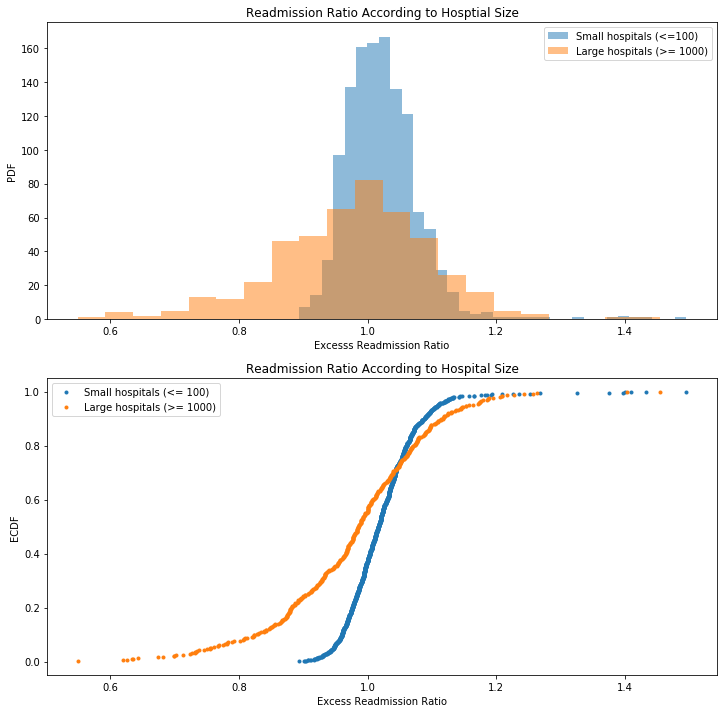

In [7]:
# Compute ecdfs
def ecdf(data):
    """Compute ECDF for a one-dimensional array of measurements."""
    # Number of data points
    n = len(data)
    # x-data for the ECDF
    x = np.sort(data)
    # y-data for the ECDF
    y = np.arange(1, n+1) / n
    return x, y

small_x, small_y = ecdf(small['Excess Readmission Ratio'])
large_x, large_y = ecdf(large['Excess Readmission Ratio'])

# Plot histograms
fig = plt.figure(figsize=(12, 12))
plt.subplot(2,1,1)
small_bins = int(np.sqrt(small['Excess Readmission Ratio'].count()))
large_bins = int(np.sqrt(large['Excess Readmission Ratio'].count()))
plt.hist(small['Excess Readmission Ratio'], bins=small_bins, alpha=0.5)
plt.hist(large['Excess Readmission Ratio'], bins=large_bins, alpha=0.5)
plt.xlabel('Excesss Readmission Ratio')
plt.ylabel('PDF')
plt.title('Readmission Ratio According to Hosptial Size')
plt.legend(('Small hospitals (<=100)', 'Large hospitals (>= 1000)'))

# Plot ecdfs
plt.subplot(2,1,2)
plt.plot(small_x, small_y, marker='.', linestyle='none')
plt.plot(large_x, large_y, marker='.', linestyle='none')
plt.xlabel('Excess Readmission Ratio')
plt.ylabel('ECDF')
plt.title('Readmission Ratio According to Hospital Size')
plt.legend(('Small hospitals (<= 100)', 'Large hospitals (>= 1000)'))

As you can see from the calculations and histograms above, the readmission ratios of large hospitals look normally distributed, with a center of 0.978 (the mean readmission ratio). The readmission ratios of small hospitals also look normally distributed, but the center is at 1.022, and the range is more compressed than for large hospitals. We can see this in the CDFs of large and small hospitals as well - the distribution of readmission ratios of small hospitals is much narrower (smaller standard deviation). Additionally, we can see that large hospitals seem to have more spread on the lower side of the readmission ratio.

#### 2. Compute and report the observed significance value (or p-value).

In [8]:
import scipy.stats as stats

# T-test to check for difference in the means
small_std = small['Excess Readmission Ratio'].std()
small_var = (small_std * small_std) / small['Excess Readmission Ratio'].count()
large_std = large['Excess Readmission Ratio'].std()
large_var = (large_std * large_std) / large['Excess Readmission Ratio'].count()
diff_std = np.sqrt(small_var + large_var)
diff_mean = small_mean - large_mean
t_val = diff_mean / diff_std
t_statistic = stats.norm.cdf(-t_val)
print('The t-score is', t_val, 'and the p-value is', t_statistic)

t_score, p_value = stats.ttest_ind(small['Excess Readmission Ratio'], large['Excess Readmission Ratio'], equal_var=False)
print('The t-score is', t_score, 'and the p-value is', p_value)

# Function to generate permutation sample
def permutation_sample(data1, data2):
    """Generate a permutation sample from two data sets."""

    # Concatenate the data sets
    data = np.concatenate((data1, data2))

    # Permute the concatenated array
    permuted_data = np.random.permutation(data)

    # Split the permuted array into two
    perm_sample_1 = permuted_data[:len(data1)]
    perm_sample_2 = permuted_data[len(data1):]

    return perm_sample_1, perm_sample_2

# Function to generate permutation replicates
def draw_perm_reps(data_1, data_2, func, size=1):
    """Generate multiple permutation replicates."""

    # Initialize array of replicates
    perm_replicates = np.empty(size)

    for i in range(size):
        # Generate permutation sample
        perm_sample_1, perm_sample_2 = permutation_sample(data_1, data_2)

        # Compute the test statistic
        perm_replicates[i] = func(perm_sample_1, perm_sample_2)
    
    return perm_replicates   
    
def diff_of_means(data_1, data_2):
    """Difference in means of two arrays."""

    # The difference of means of data_1, data_2
    diff = abs(np.mean(data_1) - np.mean(data_2))

    return diff

# Draw 10,000 permutation replicates: perm_replicates
perm_replicates = draw_perm_reps(small['Excess Readmission Ratio'], large['Excess Readmission Ratio'], diff_of_means, size=10000)

# Compute p-value: p
p = np.sum(perm_replicates >= diff_mean) / len(perm_replicates)
percent = round(p*100, 2)
print('By bootstrapping, the p-value for the null hypothesis is', round(p, 5))


The t-score is 7.533013522095164 and the p-value is 2.4791237303379877e-14
The t-score is 7.533013522095164 and the p-value is 2.0604659724727482e-13
By bootstrapping, the p-value for the null hypothesis is 0.0


Using either a one-sided t-test or bootstrapping, the p-value is essentially zero (2e-13). Therefore, we reject the null hypothesis that the mean readmission rates for small and large hospitals are the same, and conclude that the mean readmission rate of small hospitals is higher than the mean readmission rate for large hospitals.

#### 3. Report statistical significance for  𝛼  = .01.
A statistical significance level of 𝛼 =0.01 means that the p-value must be lower than 0.01. The calculated p_values above range from p <= 1e-4 to p <= 2e-13, so our conclusions are valid for a significance level of 𝛼 =0.01

#### 4. Discuss statistical significance and practical significance. Do they differ here?
Statistical significance simply means that an observed difference in two samples is a true difference between the two populations and not likely a result of chance. However, just because there is a statistical significance between two populations does not mean that the difference is practical to act on.  

Our statistical analysis indicates that small hospitals do indeed have a higher readmission rate than larger hospitals. However, the mean readmission rate of small hospitals is only 1.022 compared to 0.978 for large hospitals, a difference of only 0.044 in the means. It is not practical to act upon such a small difference in the means, even though that difference is significant.  

If the readmission rate for small hospitals was much larger, say 2 or 3, then it might indeed be worthwhile to further investigate potential causes of the difference and suggest policy changes to reduce the readmission rate at small hospitals. As it is, however, the time and trouble caused by enacting policy changes would not be worthwhile for a relatively minor decrease in the readmission rate.

#### 5. Look at the scatterplot above.
What are the advantages and disadvantages of using this plot to convey information?  

The plot is good for proving a 'big picture' view of the data and showing the relationship between the number of discharges and the excess readmission ratio. However, the data are too dense throughout much of the plot to see individual data points, and the red and green areas of the chart are confusing and not clearly tied to any statistical analysis.

Construct another plot that conveys the same information in a more direct manner.

Either the histograms or CDF plots from my earlier analysis convey much more clearly the difference in the mean readmission rates between small and large hospitals

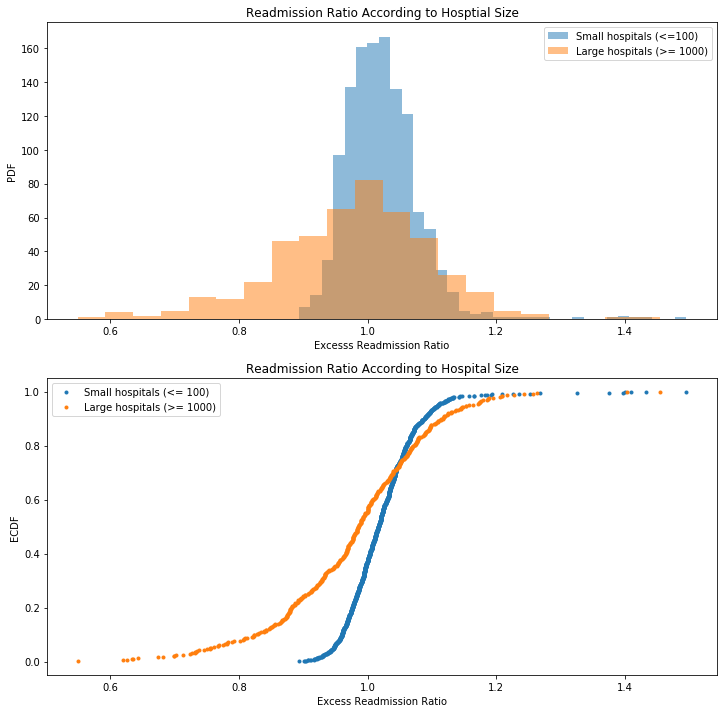

In [9]:
# Plot histograms
fig = plt.figure(figsize=(12, 12))
plt.subplot(2,1,1)
small_bins = int(np.sqrt(small['Excess Readmission Ratio'].count()))
large_bins = int(np.sqrt(large['Excess Readmission Ratio'].count()))
plt.hist(small['Excess Readmission Ratio'], bins=small_bins, alpha=0.5)
plt.hist(large['Excess Readmission Ratio'], bins=large_bins, alpha=0.5)
plt.xlabel('Excesss Readmission Ratio')
plt.ylabel('PDF')
plt.title('Readmission Ratio According to Hosptial Size')
plt.legend(('Small hospitals (<=100)', 'Large hospitals (>= 1000)'))

# Plot ecdfs
plt.subplot(2,1,2)
plt.plot(small_x, small_y, marker='.', linestyle='none')
plt.plot(large_x, large_y, marker='.', linestyle='none')
plt.xlabel('Excess Readmission Ratio')
plt.ylabel('ECDF')
plt.title('Readmission Ratio According to Hospital Size')
plt.legend(('Small hospitals (<= 100)', 'Large hospitals (>= 1000)'))